## Simulación de Datos de Crédito

Este dataset simula información financiera de 1,000 individuos, con el objetivo de predecir la probabilidad de incumplimiento de pagos de un préstamo.

### Variables:
- **edad**: Edad del individuo.
- **ingresos_mensuales**: Ingresos mensuales de la persona.
- **monto_prestamo**: Monto del préstamo solicitado.
- **historial_crediticio**: Puntaje de crédito del individuo.
- **cuentas_abiertas**: Número de cuentas de crédito abiertas.
- **ratio_deuda_ingreso**: Proporción entre la deuda y los ingresos mensuales.
- **incumplimiento**: Indica si el individuo ha incumplido con los pagos (1) o no (0), basado en una regla simple.

La variable **incumplimiento** se calcula con base en el monto del préstamo, el historial crediticio y la relación deuda-ingreso.


In [2]:
import pandas as pd
import numpy as np

# Semilla para reproducibilidad
np.random.seed(42)

# Número de muestras
n = 1000

# Generar columnas
edad = np.random.randint(18, 70, size=n)
ingresos_mensuales = np.random.normal(3000, 1000, size=n).round(2)
monto_prestamo = np.random.normal(8000, 3000, size=n).round(2)
historial_crediticio = np.random.randint(300, 850, size=n)
cuentas_abiertas = np.random.randint(1, 10, size=n)
ratio_deuda_ingreso = np.random.uniform(0.1, 0.9, size=n).round(2)

# Regla sencilla para simular impago
incumplimiento = (
    (monto_prestamo > ingresos_mensuales * 2) |
    (historial_crediticio < 500) |
    (ratio_deuda_ingreso > 0.6)
).astype(int)

# Crear DataFrame
df = pd.DataFrame({
    "edad": edad,
    "ingresos_mensuales": ingresos_mensuales,
    "monto_prestamo": monto_prestamo,
    "historial_crediticio": historial_crediticio,
    "cuentas_abiertas": cuentas_abiertas,
    "ratio_deuda_ingreso": ratio_deuda_ingreso,
    "incumplimiento": incumplimiento
})

# Mostrar las primeras filas
df.head()




,edad,ingresos_mensuales,monto_prestamo,historial_crediticio,cuentas_abiertas,ratio_deuda_ingreso,incumplimiento
0,56,1393.55,13180.89,719,4,0.19,1
1,69,3203.46,6801.09,551,8,0.77,1
2,46,2243.65,8674.05,848,6,0.59,1
3,32,1577.75,10797.77,634,2,0.36,1
4,60,2353.43,3744.90,391,9,0.25,1


In [6]:
(df['incumplimiento']==0).sum()

121

## Modelo de Regresión Logística

Este código entrena un **modelo de regresión logística** para predecir el **incumplimiento de pagos**.

### Pasos:
1. Se dividen los datos en entrenamiento (70%) y prueba (30%).
2. El modelo se entrena con el conjunto de entrenamiento.
3. Se evalúa el rendimiento utilizando la **precisión** 

### Resultados:
- **Precisión**: Exactitud del modelo en el conjunto de prueba.


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


# Dividir el dataset en X (características) y Y (objetivo)
X = df.drop("incumplimiento", axis=1)
y = df["incumplimiento"]

# Dividir el dataset en entrenamiento y prueba (70%/30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo de regresión logística
model = LogisticRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)


print("Precisión del modelo:", accuracy)


NameError: name 'df' is not defined

In [8]:
# Datos de un nuevo cliente (debe ser un DataFrame con los mismos nombres de columna)
nuevo_cliente = pd.DataFrame([{
    "edad": 35,
    "ingresos_mensuales": 3000,
    "monto_prestamo": 7000,
    "historial_crediticio": 480,
    "cuentas_abiertas": 3,
    "ratio_deuda_ingreso": 0.65
}])

# Predecir si incumplirá o no
prediccion = model.predict(nuevo_cliente)
probabilidad = model.predict_proba(nuevo_cliente)

# Mostrar resultados
if prediccion[0] == 1:
    print("⚠️ El cliente probablemente NO pagará la deuda (incumplirá).")
else:
    print("✅ El cliente probablemente pagará la deuda.")

print("Probabilidad de incumplimiento:", probabilidad[0][1])
print("Probabilidad de pago:", probabilidad[0][0])


⚠️ El cliente probablemente NO pagará la deuda (incumplirá).
Probabilidad de incumplimiento: 0.9667572975895261
Probabilidad de pago: 0.03324270241047389


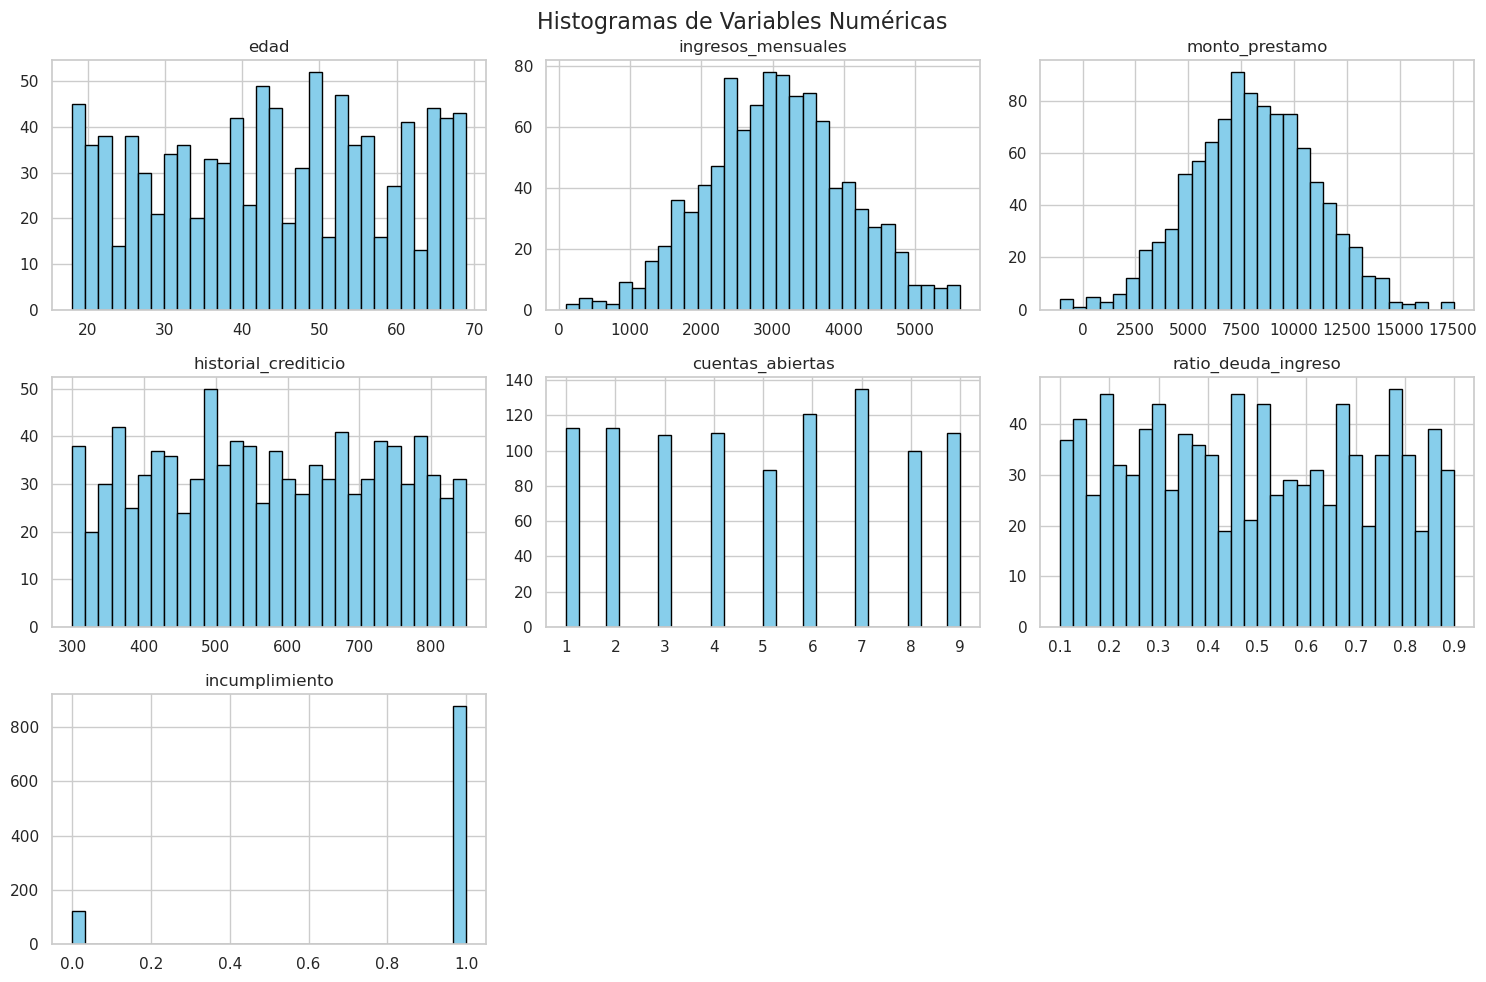

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

df.hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Histogramas de Variables Numéricas', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()



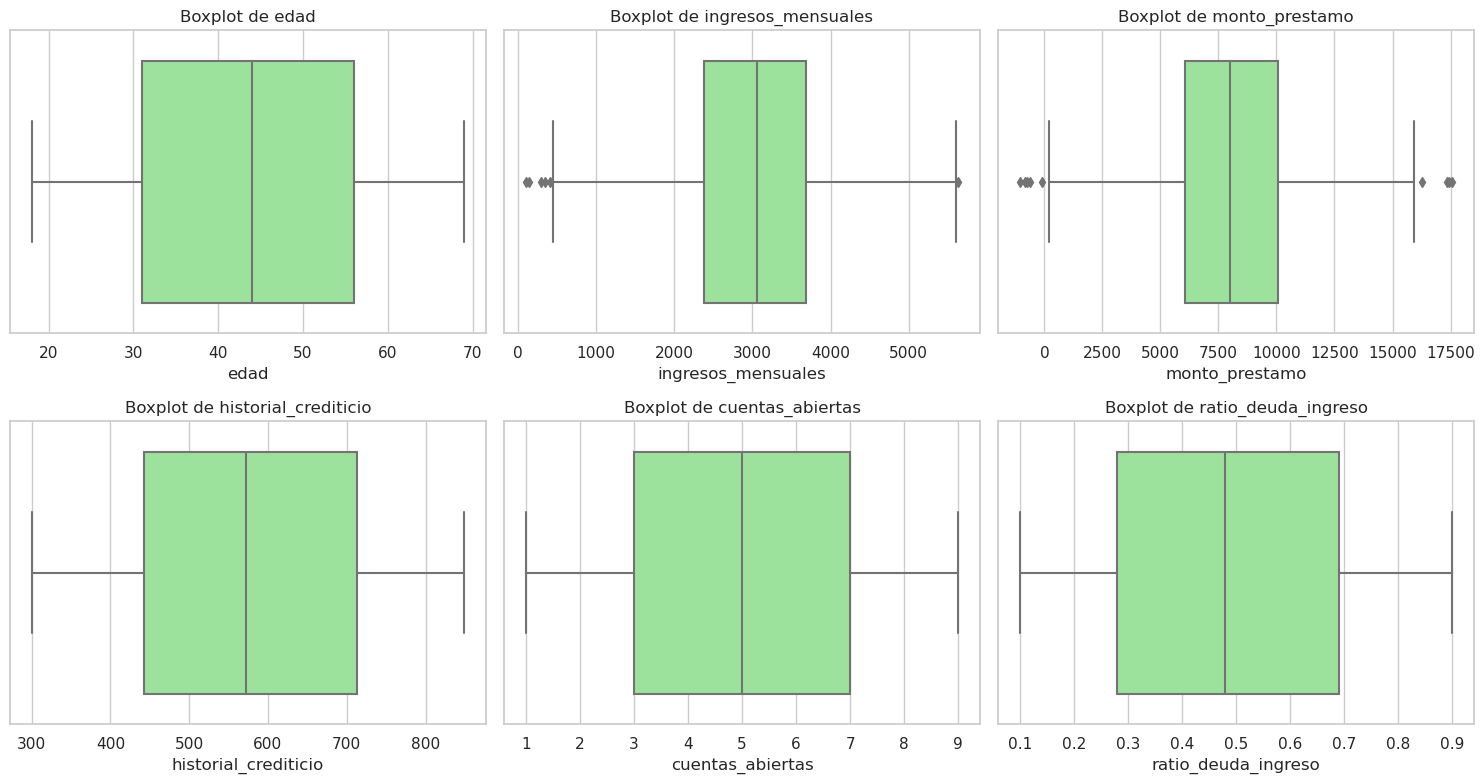

In [10]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(df.drop("incumplimiento", axis=1).columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()


## Matriz de Correlación

Este gráfico muestra la **matriz de correlación** entre las variables del dataset, utilizando un **heatmap** para visualizar las relaciones entre ellas.

### Características:
- **Colores**: Los colores indican la fuerza de la correlación: rojo para correlaciones positivas y azul para negativas.
- **Valores**: Los valores numéricos en cada celda indican el **coeficiente de correlación** entre las variables.
- **Formato**: La matriz está anotada con los valores de correlación redondeados a dos decimales.

Este gráfico permite identificar rápidamente qué variables están más relacionadas entre sí.


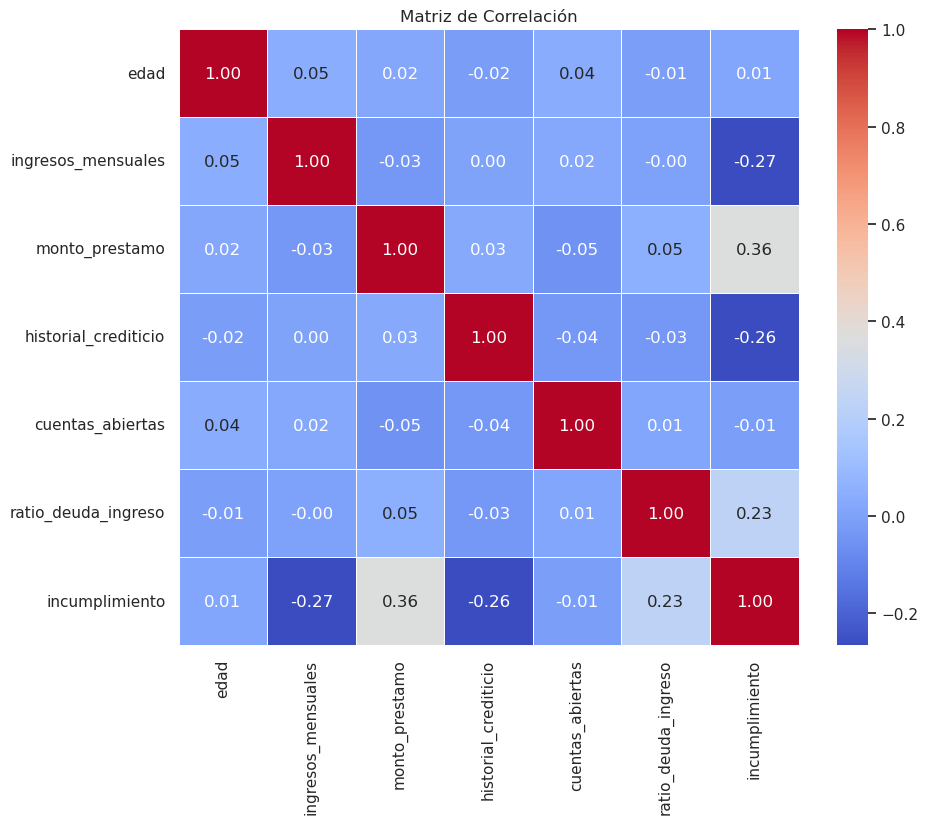

In [11]:
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()
